In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

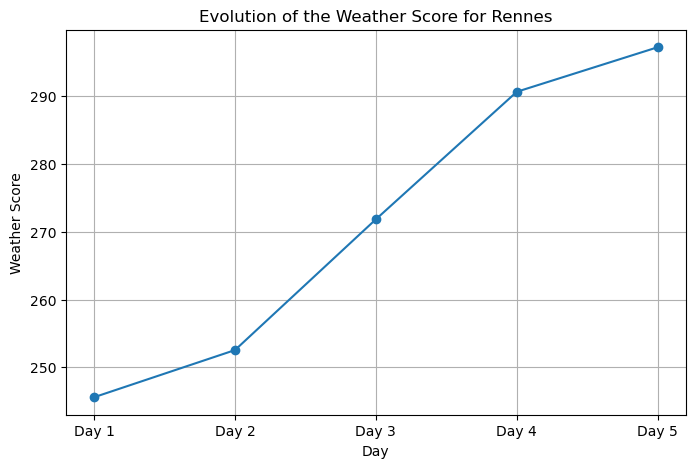

In [2]:
# Définition des chemins des fichiers
file_paths = {
    "jour1": "forecasts\weather_data_forecast_1day.csv",
    "jour2": "forecasts\weather_data_forecast_2day.csv",
    "jour3": "forecasts\weather_data_forecast_3day.csv",
    "jour4": "forecasts\weather_data_forecast_4day.csv",
    "jour5": "forecasts\weather_data_forecast_5day.csv",
}

# Charger chaque fichier en DataFrame
dfs = {day: pd.read_csv(path) for day, path in file_paths.items()}

# Liste des colonnes à conserver une seule fois
columns_to_keep_once = ["Ville", "Latitude", "Longitude", "Date"]

# Séparer les colonnes uniques et les données spécifiques aux jours
df_base = dfs["jour1"][columns_to_keep_once].copy()  # On garde ces colonnes depuis le premier fichier

# Supprimer ces colonnes des autres fichiers avant la fusion et ajouter des suffixes
for day in dfs:
    dfs[day] = dfs[day].drop(columns=columns_to_keep_once, errors="ignore").add_suffix(f"_{day}")

# Fusionner les fichiers sans les colonnes redondantes
all_data = pd.concat([df_base] + list(dfs.values()), axis=1)

# Filtrer les données pour la ville de Rennes
Rennes_data = all_data[all_data["Ville"] == "Rennes"]

# Extraire les scores météo pour chaque jour avec les bons suffixes
weather_scores = {
    "Day 1": Rennes_data["Weather_Score_jour1"].mean(),
    "Day 2": Rennes_data["Weather_Score_jour2"].mean(),
    "Day 3": Rennes_data["Weather_Score_jour3"].mean(),
    "Day 4": Rennes_data["Weather_Score_jour4"].mean(),
    "Day 5": Rennes_data["Weather_Score_jour5"].mean(),
}

# Tracer un line plot des scores météo
plt.figure(figsize=(8, 5))
plt.plot(list(weather_scores.keys()), list(weather_scores.values()), marker="o", linestyle="-")

# Ajouter des labels
plt.xlabel("Day")
plt.ylabel("Weather Score")
plt.title("Evolution of the Weather Score for Rennes")
plt.grid(True)

# Afficher le graphique
plt.show()


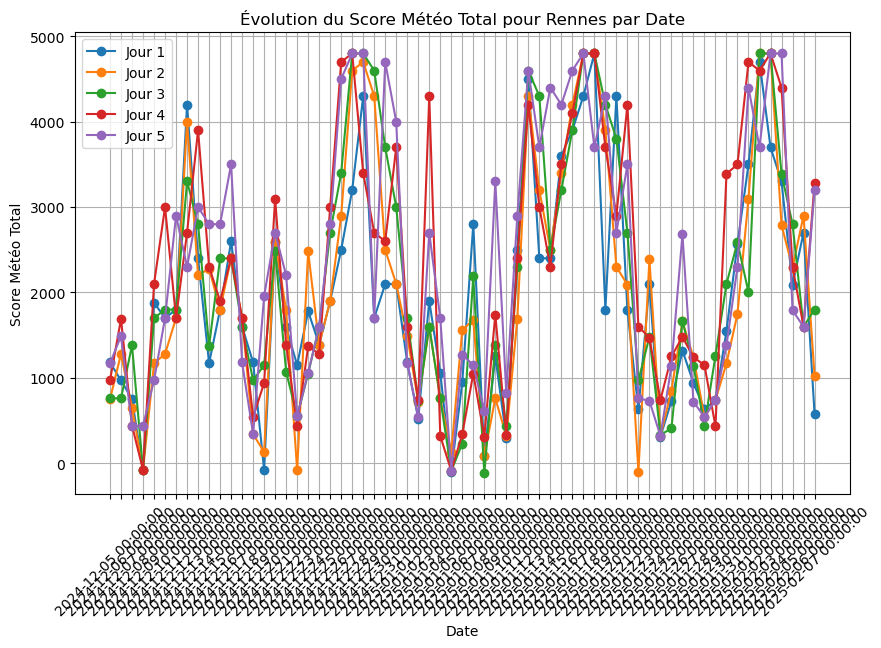

In [7]:
# Regrouper par date et sommer les scores météo pour chaque jour
weather_scores_sum = Rennes_data.groupby("Date")[
    ["Weather_Score_jour1", "Weather_Score_jour2", "Weather_Score_jour3", "Weather_Score_jour4", "Weather_Score_jour5"]
].sum()

# Renommer les colonnes pour plus de clarté
weather_scores_sum.columns = ["Jour 1", "Jour 2", "Jour 3", "Jour 4", "Jour 5"]

# Tracer un line plot des scores météo cumulés par date
plt.figure(figsize=(10, 6))
for column in weather_scores_sum.columns:
    plt.plot(weather_scores_sum.index, weather_scores_sum[column], marker="o", linestyle="-", label=column)

# Ajouter des labels et une légende
plt.xlabel("Date")
plt.ylabel("Score Météo Total")
plt.title("Évolution du Score Météo Total pour Rennes par Date")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

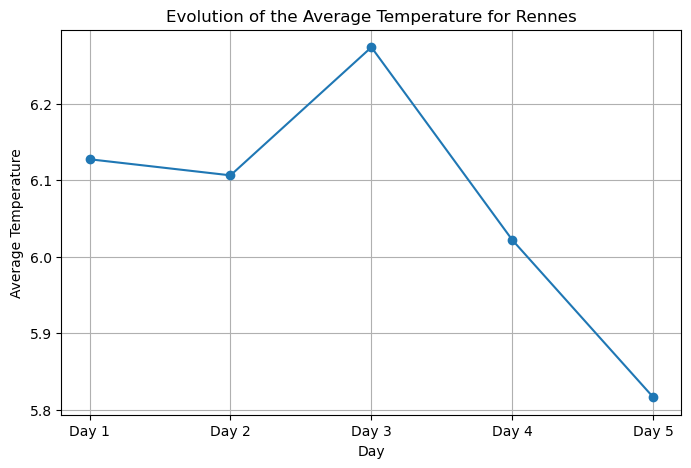

In [8]:

# Extraire les scores météo pour chaque jour avec les bons suffixes
Temp_Avg = {
    "Day 1": Rennes_data["Temp_Avg_jour1"].mean(),
    "Day 2": Rennes_data["Temp_Avg_jour2"].mean(),
    "Day 3": Rennes_data["Temp_Avg_jour3"].mean(),
    "Day 4": Rennes_data["Temp_Avg_jour4"].mean(),
    "Day 5": Rennes_data["Temp_Avg_jour5"].mean(),
}

# Tracer un line plot des scores météo
plt.figure(figsize=(8, 5))
plt.plot(list(Temp_Avg.keys()), list(Temp_Avg.values()), marker="o", linestyle="-")

# Ajouter des labels
plt.xlabel("Day")
plt.ylabel("Average Temperature")
plt.title("Evolution of the Average Temperature for Rennes")
plt.grid(True)

# Afficher le graphique
plt.show()

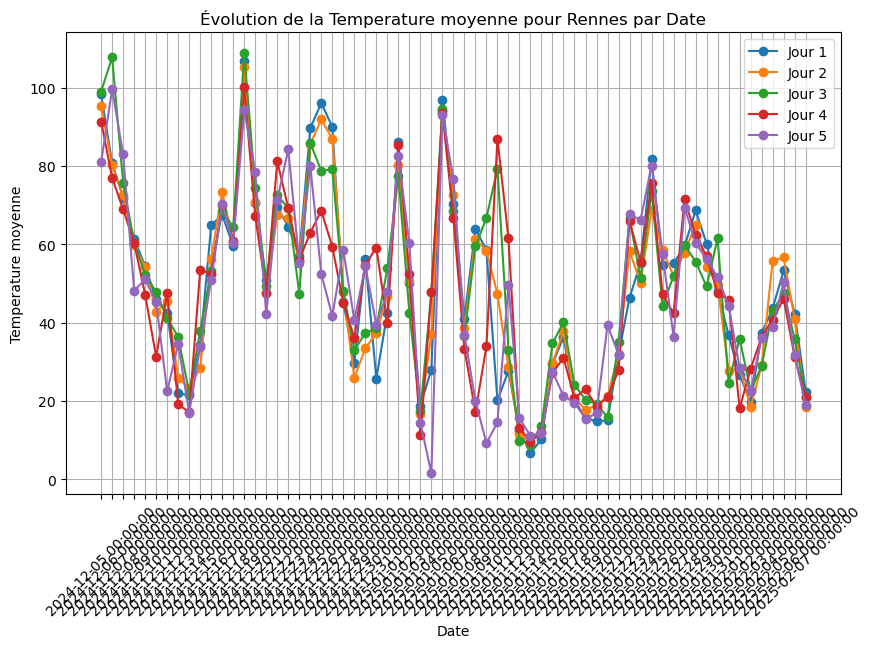

In [9]:

# Regrouper par date et sommer les scores météo pour chaque jour
Temp_Avg_sum = Rennes_data.groupby("Date")[
    ["Temp_Avg_jour1", "Temp_Avg_jour2", "Temp_Avg_jour3", "Temp_Avg_jour4", "Temp_Avg_jour5"]
].sum()

# Renommer les colonnes pour plus de clarté
Temp_Avg_sum.columns = ["Jour 1", "Jour 2", "Jour 3", "Jour 4", "Jour 5"]

# Tracer un line plot des scores météo cumulés par date
plt.figure(figsize=(10, 6))
for column in Temp_Avg_sum.columns:
    plt.plot(Temp_Avg_sum.index, Temp_Avg_sum[column], marker="o", linestyle="-", label=column)

# Ajouter des labels et une légende
plt.xlabel("Date")
plt.ylabel("Temperature moyenne")
plt.title("Évolution de la Temperature moyenne pour Rennes par Date")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Avg Temp 

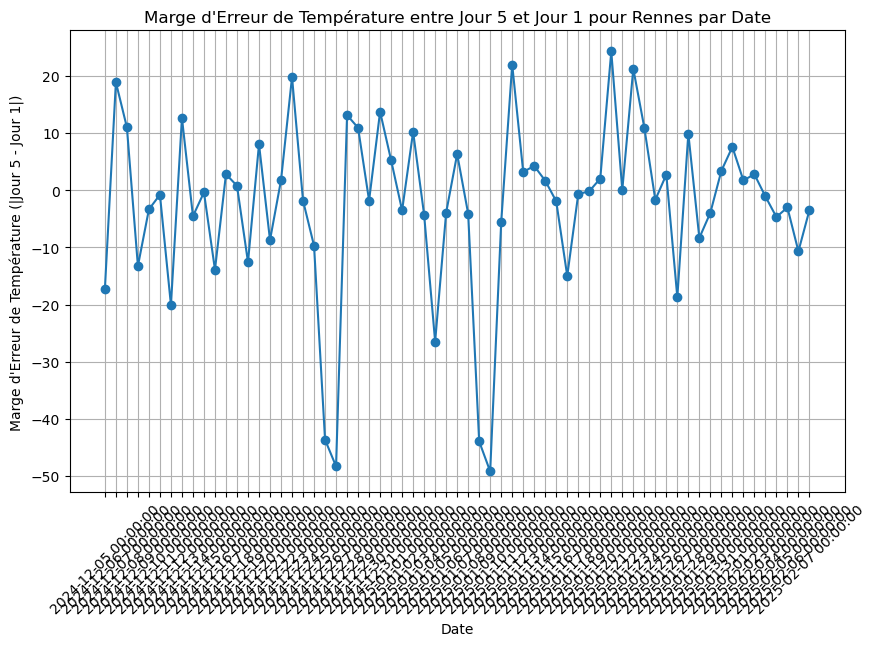

In [10]:
# Calculer la marge d'erreur entre les températures "jour5" et "jour1"
Temp_Error_Margin = (Temp_Avg_sum["Jour 5"] - Temp_Avg_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Temp_Error_Margin.index, Temp_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Température (|Jour 5 - Jour 1|)")
plt.title("Marge d'Erreur de Température entre Jour 5 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

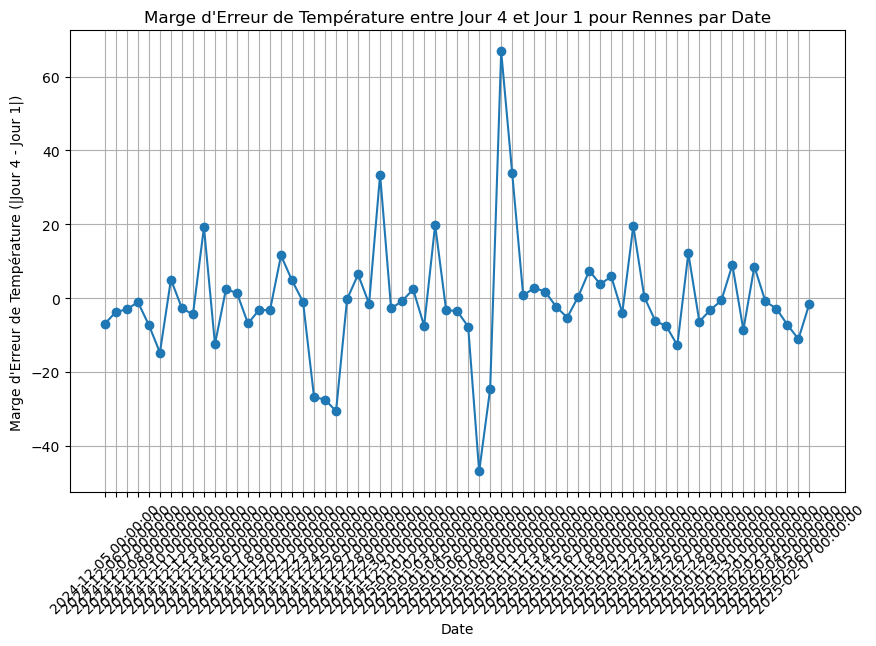

In [11]:
# Calculer la marge d'erreur entre les températures "jour5" et "jour1"
Temp_Error_Margin = (Temp_Avg_sum["Jour 4"] - Temp_Avg_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Temp_Error_Margin.index, Temp_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Température (|Jour 4 - Jour 1|)")
plt.title("Marge d'Erreur de Température entre Jour 4 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

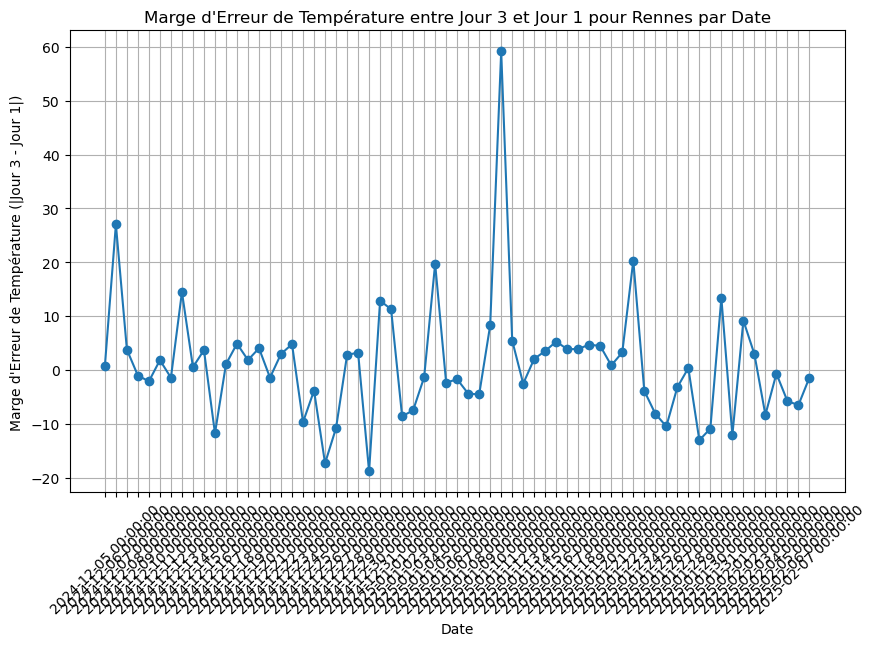

In [12]:
# Calculer la marge d'erreur entre les températures "jour5" et "jour1"
Temp_Error_Margin = (Temp_Avg_sum["Jour 3"] - Temp_Avg_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Temp_Error_Margin.index, Temp_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Température (|Jour 3 - Jour 1|)")
plt.title("Marge d'Erreur de Température entre Jour 3 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

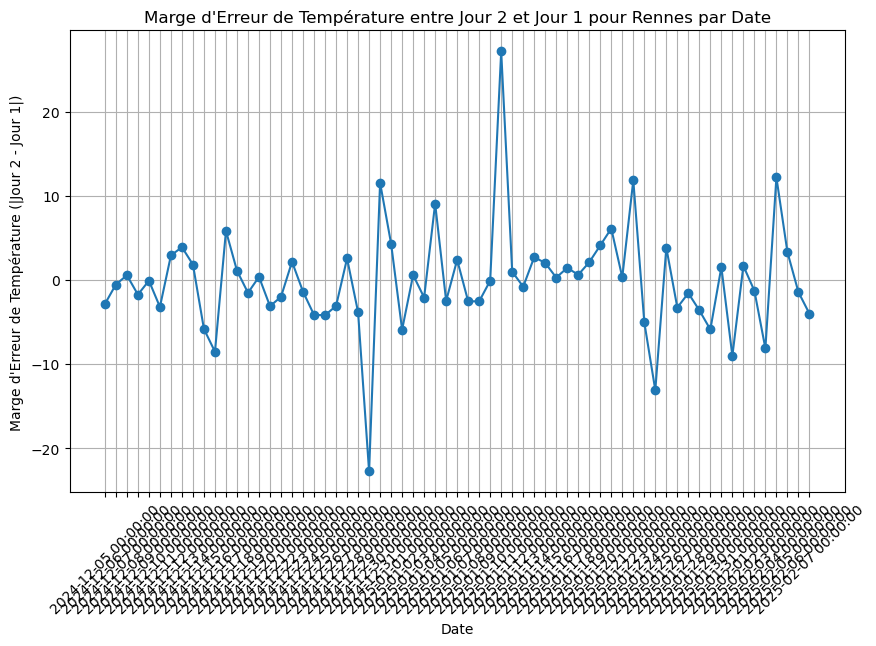

In [13]:
# Calculer la marge d'erreur entre les températures "jour5" et "jour1"
Temp_Error_Margin = (Temp_Avg_sum["Jour 2"] - Temp_Avg_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Temp_Error_Margin.index, Temp_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Température (|Jour 2 - Jour 1|)")
plt.title("Marge d'Erreur de Température entre Jour 2 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

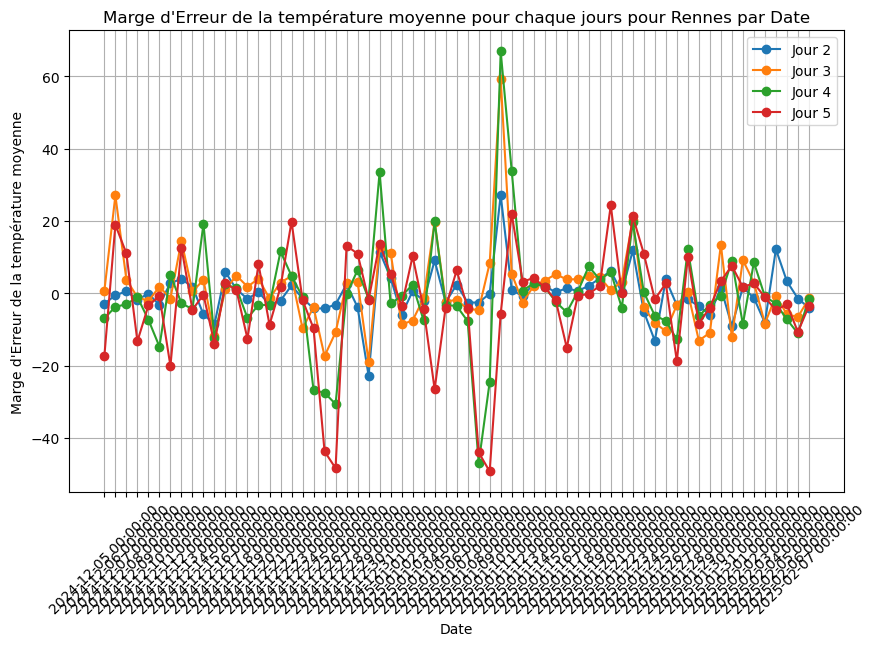

In [14]:
# Calculer la marge d'erreur entre les "weather_scores" "jour2" et "jour1"
Temp_Error_Margin1 = (Temp_Avg_sum["Jour 2"] - Temp_Avg_sum["Jour 1"])
Temp_Error_Margin2 = (Temp_Avg_sum["Jour 3"] - Temp_Avg_sum["Jour 1"])
Temp_Error_Margin3 = (Temp_Avg_sum["Jour 4"] - Temp_Avg_sum["Jour 1"])
Temp_Error_Margin4 = (Temp_Avg_sum["Jour 5"] - Temp_Avg_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Temp_Error_Margin1.index, Temp_Error_Margin1, marker="o", linestyle="-")
plt.plot(Temp_Error_Margin2.index, Temp_Error_Margin2, marker="o", linestyle="-")
plt.plot(Temp_Error_Margin3.index, Temp_Error_Margin3, marker="o", linestyle="-")
plt.plot(Temp_Error_Margin4.index, Temp_Error_Margin4, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de la température moyenne")
plt.title("Marge d'Erreur de la température moyenne pour chaque jours pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(["Jour 2", "Jour 3", "Jour 4", "Jour 5"])

# Afficher le graphique
plt.show()

# Weather Score

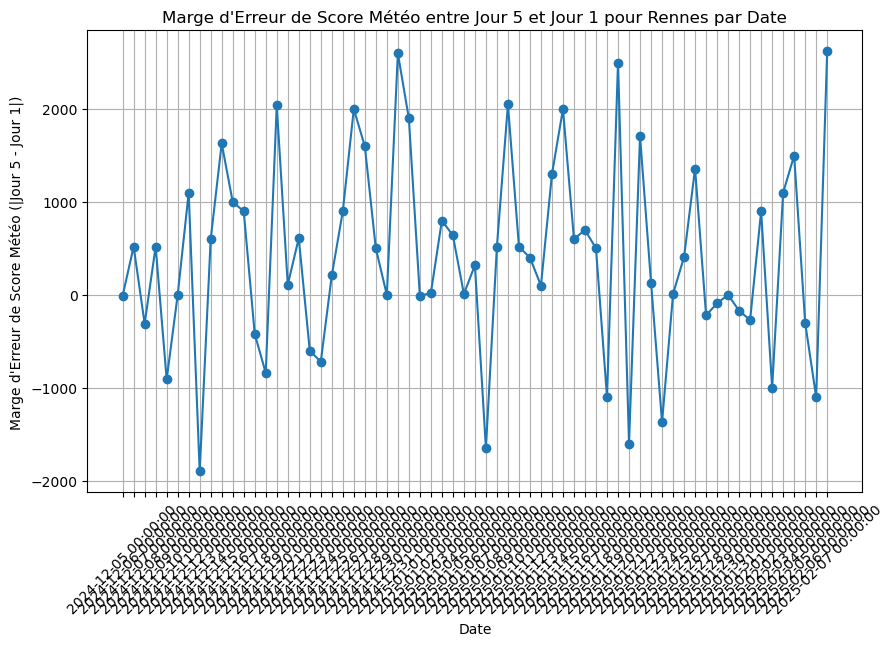

In [15]:
# Calculer la marge d'erreur entre les "weather_scores" "jour5" et "jour1"
Weather_Error_Margin = (weather_scores_sum["Jour 5"] - weather_scores_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Weather_Error_Margin.index, Weather_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Score Météo (|Jour 5 - Jour 1|)")
plt.title("Marge d'Erreur de Score Météo entre Jour 5 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

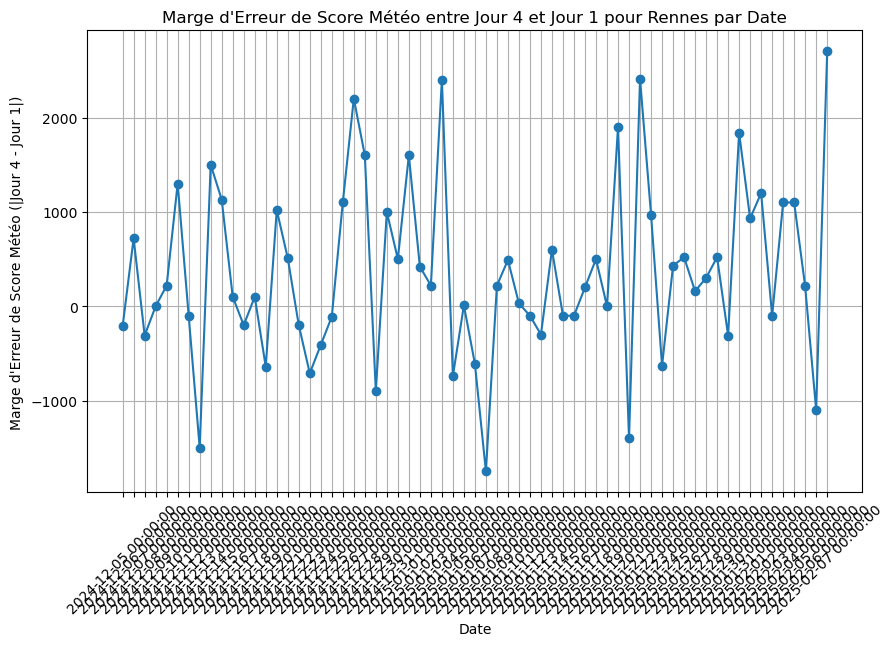

In [16]:
# Calculer la marge d'erreur entre les "weather_scores" "jour4" et "jour1"
Weather_Error_Margin = (weather_scores_sum["Jour 4"] - weather_scores_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Weather_Error_Margin.index, Weather_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Score Météo (|Jour 4 - Jour 1|)")
plt.title("Marge d'Erreur de Score Météo entre Jour 4 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

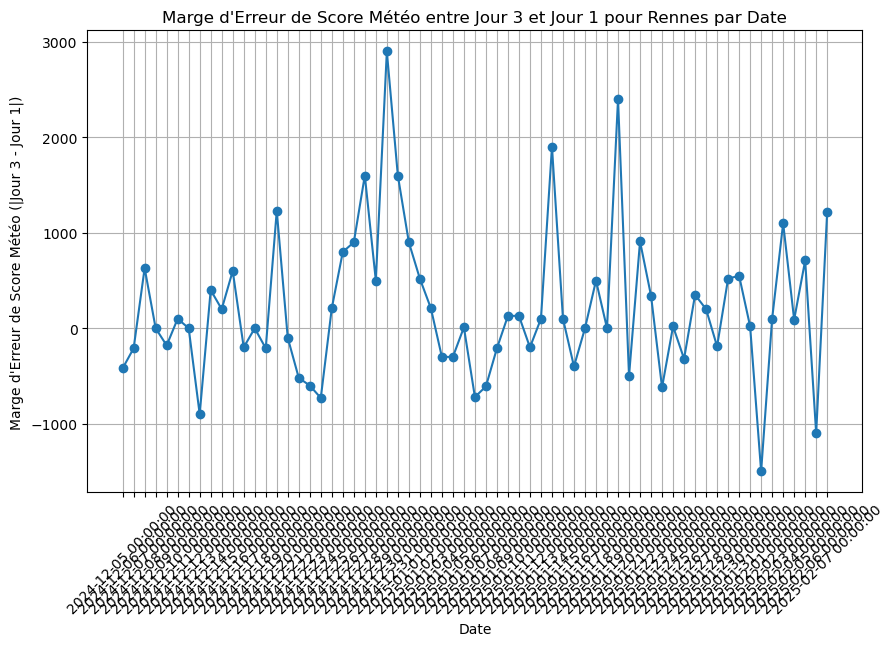

In [17]:
# Calculer la marge d'erreur entre les "weather_scores" "jour3" et "jour1"
Weather_Error_Margin = (weather_scores_sum["Jour 3"] - weather_scores_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Weather_Error_Margin.index, Weather_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Score Météo (|Jour 3 - Jour 1|)")
plt.title("Marge d'Erreur de Score Météo entre Jour 3 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

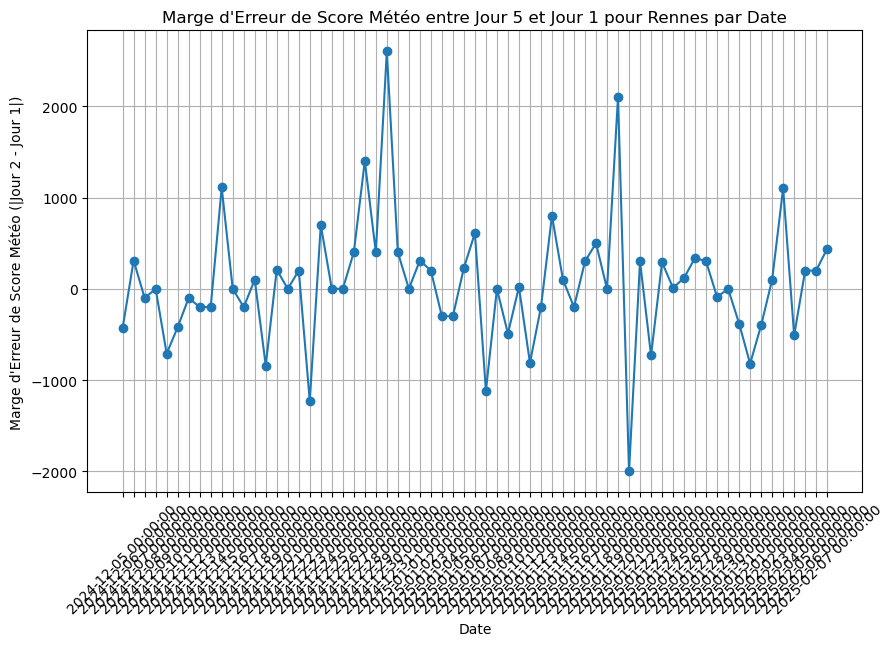

In [18]:
# Calculer la marge d'erreur entre les "weather_scores" "jour2" et "jour1"
Weather_Error_Margin = (weather_scores_sum["Jour 2"] - weather_scores_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Weather_Error_Margin.index, Weather_Error_Margin, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Score Météo (|Jour 2 - Jour 1|)")
plt.title("Marge d'Erreur de Score Météo entre Jour 5 et Jour 1 pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)

# Afficher le graphique
plt.show()

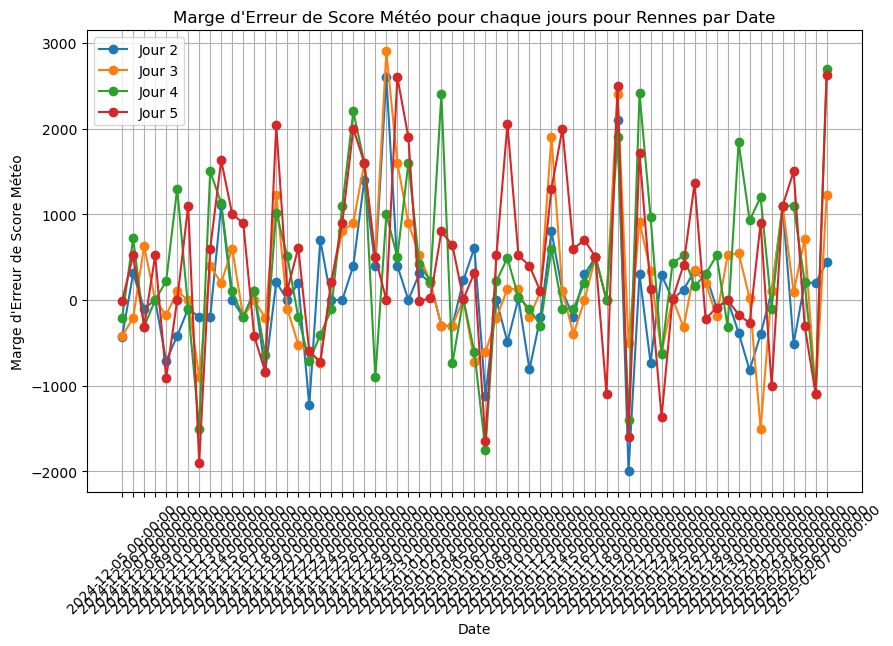

In [19]:
# Calculer la marge d'erreur entre les "weather_scores" "jour2" et "jour1"
Weather_Error_Margin1 = (weather_scores_sum["Jour 2"] - weather_scores_sum["Jour 1"])
Weather_Error_Margin2 = (weather_scores_sum["Jour 3"] - weather_scores_sum["Jour 1"])
Weather_Error_Margin3 = (weather_scores_sum["Jour 4"] - weather_scores_sum["Jour 1"])
Weather_Error_Margin4 = (weather_scores_sum["Jour 5"] - weather_scores_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Weather_Error_Margin1.index, Weather_Error_Margin1, marker="o", linestyle="-")
plt.plot(Weather_Error_Margin2.index, Weather_Error_Margin2, marker="o", linestyle="-")
plt.plot(Weather_Error_Margin3.index, Weather_Error_Margin3, marker="o", linestyle="-")
plt.plot(Weather_Error_Margin4.index, Weather_Error_Margin4, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de Score Météo")
plt.title("Marge d'Erreur de Score Météo pour chaque jours pour Rennes par Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(["Jour 2", "Jour 3", "Jour 4", "Jour 5"])

# Afficher le graphique
plt.show()